### Proyecto No.255
- Diego Cordóva 2032552
- Paola De León 2036255
- Gabriela Contreras 2022553

In [1]:
import skimage
import numpy as np 
from skimage import io, morphology, color
import matplotlib.pyplot as plt

##### PARTE NO. 255
------

##### PARTE NO. 2
------

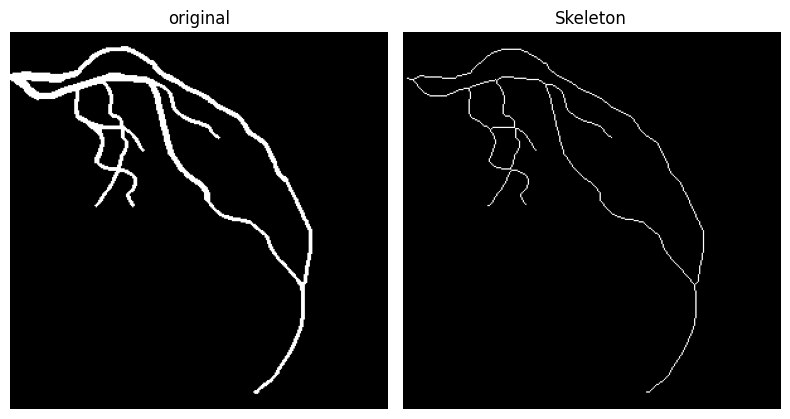

In [2]:
from skimage import morphology as mo
from skimage.morphology import medial_axis, skeletonize

def read_img(filepath):
    data = open(filepath, 'rb')
    img = plt.imread(data)
    return img

def create_skeleton(img):
    T = mo.thin(img)
    skeleton_lee = skeletonize(T, method='lee')
    return skeleton_lee

# ejemplo de uso
img = read_img('./database/2_gt.pgm')
skel = create_skeleton(img)

fig, axes = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skel, cmap='gray')
ax[1].set_title('Skeleton')
ax[1].axis('off')

fig.tight_layout()
plt.show()

In [3]:
from skimage.feature import corner_peaks, corner_fast, corner_harris, corner_shi_tomasi

def draw_nodes(og_img, coords: list[dict[list, str]]):
    fig, ax = plt.subplots()
    ax.imshow(og_img, cmap=plt.cm.gray)

    for cor in coords:
        actual_coords = cor['coords']
        if len(actual_coords) == 0: continue
        actual_color = cor['color']
        ax.plot(actual_coords[:, 1], actual_coords[:, 0], color=actual_color, marker='o', linestyle='None', markersize=4)

    ax.axis('off')
    plt.show()

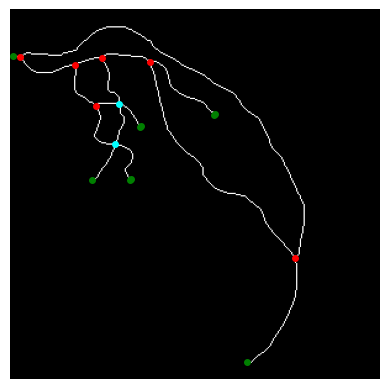

In [10]:
from math import sqrt

def euclidean_d(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def getRotations(arr: list[np.ndarray]) -> list[np.ndarray]:
    rotations = []
    for a in arr:
        rot1 = np.rot90(a)
        rot2 = np.rot90(rot1)
        rot3 = np.rot90(rot2)
        rot4 = np.rot90(rot3)
        rotations = rotations + [rot4, rot1, rot2, rot3]

    return rotations

def arr_in_pool(arr, pool):
    for p in pool:
        if np.array_equal(arr, p):
            return True
        
    return False

b_pool_4 = getRotations([
    np.array([
        [255, 255, 255],
        [ 0 , 255,  0 ],
        [ 0 , 255,  0 ],
    ]),
    np.array([
        [255,  0 , 255],
        [ 0 , 255,  0 ],
        [ 0 , 255,  0 ],
    ]),
    np.array([
        [ 0 ,  0 , 255],
        [255, 255,  0 ],
        [ 0 , 255,  0 ],
    ]),
    np.array([
        [ 0 , 255,  0 ],
        [255, 255, 255],
        [ 0 ,  0 , 255],
    ]),
    np.array([
        [ 0 , 255,  0 ],
        [255, 255, 255],
        [255,  0 ,  0 ],
    ]),
    np.array([
        [255,  0 , 255],
        [ 0 , 255,  0 ],
        [ 0 ,  0 , 255],
    ]),
])

b_pool_5 = getRotations([
    np.array([
        [ 0 , 255,  0 ],
        [255, 255, 255],
        [ 0 ,  0 , 255],
    ]),

    np.array([
        [ 0 , 255,  0 ],
        [255, 255, 255],
        [255,  0 ,  0 ],
    ]),
])

t_pool_3x3 = getRotations([
    np.array([
        [ 0 , 255,  0 ],
        [255, 255, 255],
        [ 0 , 255,  0 ],
    ]),

    np.array([
        [255,  0 , 255],
        [ 0 , 255,  0 ],
        [255,  0 , 255],
    ]),

    np.array([
        [ 0 , 255,  0 ],
        [255,  0 , 255],
        [ 0 , 255,  0 ],
    ]),
])

t_pool_4x4 = getRotations([
    np.array([
        [ 0 , 255,  0 ,  0 ],
        [255, 255,  0 ,  0 ],
        [ 0 ,  0 , 255, 255],
        [ 0 ,  0 , 255,  0 ],
    ]),
    np.array([
        [ 0 , 255,  0 ,  0 ],
        [255, 255,  0 ,  0 ],
        [ 0 ,  0 , 255, 255],
        [ 0 , 255,  0 ,  0 ],
    ]),
    np.array([
        [ 0 , 255,  0 ,  0 ],
        [255, 255,  0 , 255],
        [ 0 ,  0 , 255,  0 ],
        [ 0 ,  0 , 255,  0 ],
    ]),
    np.array([
        [ 0 ,  0 , 255,  0 ],
        [255, 255,  0 ,  0 ],
        [ 0 ,  0 , 255, 255],
        [ 0 ,  0 , 255,  0 ],
    ]),
    np.array([
        [ 0 , 255,  0 ,  0 ],
        [ 0 , 255,  0 ,  0 ],
        [255,  0 , 255, 255],
        [ 0 ,  0 , 255,  0 ],
    ]),
    np.array([
        [ 0 , 255,  0 ,  0 ],
        [ 0 , 255,  0 , 255],
        [255,  0 , 255,  0 ],
        [ 0 ,  0 , 255,  0 ],
    ]),
    np.array([
        [ 0 ,  0 , 255,  0 ],
        [255, 255,  0 ,  0 ],
        [ 0 ,  0 , 255, 255],
        [ 0 , 255,  0 ,  0 ],
    ]),
])

def get_nodes(image):
    borders = []
    bifurcaciones = []
    trifurcaciones = []

    for i in range(len(image)):
        for j in range(len(image[0])):
            if i == j: continue

            grid = image[i-1: i+2, j-1: j+2]
            grid_4x4 = image[i-1: i+3, j-1: j+3]
            whites = np.count_nonzero(grid == 255)
            whites_4 = np.count_nonzero(grid_4x4 == 255)

            # trifurcaciones
            if whites == 5 and arr_in_pool(grid, t_pool_3x3):
                trifurcaciones.append([i, j])
            
            if whites_4 == 6 and arr_in_pool(grid_4x4, t_pool_4x4):
                trifurcaciones.append([i, j])
                continue

            # bordes
            if whites == 1:
                loc = np.where(grid == 255)
                loc = [loc[0], loc[1]]
                
                if loc not in [[0, 0], [0, 2], [2, 0], [2, 2]]:
                    borders.append([i, j])
      
            # bifurcaciones
            if whites == 4 and arr_in_pool(grid, b_pool_4):
                bifurcaciones.append([i, j])

            if whites == 5 and arr_in_pool(grid, b_pool_5):
                bifurcaciones.append([i, j])

    # Clean unwanted bifurcaciones
    b_to_delete = []
    for b in range(len(bifurcaciones)):
        for t in trifurcaciones:
            if euclidean_d(bifurcaciones[b], t) < 5:
                b_to_delete.append(b)
    
    bifurcaciones = [bifurcaciones[i] for i in range(len(bifurcaciones)) if i not in b_to_delete]

    # Clean unwanted borders
    b_to_delete = []
    for b in range(len(borders)):
        for t in trifurcaciones:
            if euclidean_d(borders[b], t) < 5:
                b_to_delete.append(b)
                continue
        
        for bi in bifurcaciones:
            if euclidean_d(borders[b], bi) < 5:
                b_to_delete.append(b)

    borders = [borders[i] for i in range(len(borders)) if i not in b_to_delete]

    # return: borders, bifuurcaciones, trifurcaciones
    return np.array(borders), np.array(bifurcaciones), np.array(trifurcaciones)

borders, bif, tri = get_nodes(skel)

draw_nodes(skel, [
    {'coords': borders, 'color': 'green'},
    {'coords': bif, 'color': 'red'},
    {'coords': tri, 'color': 'cyan'},
])

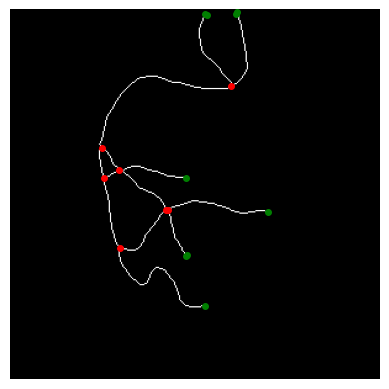

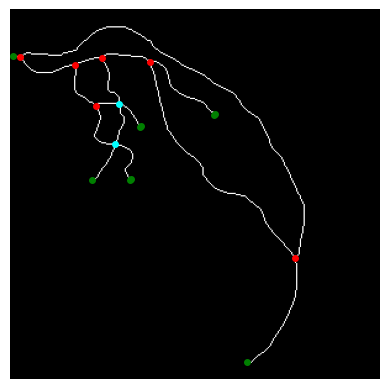

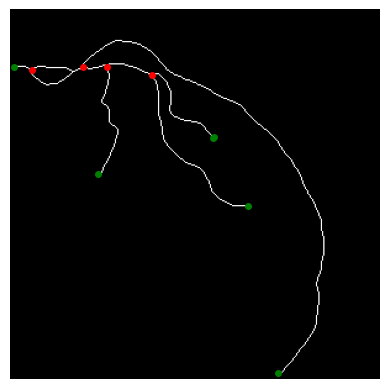

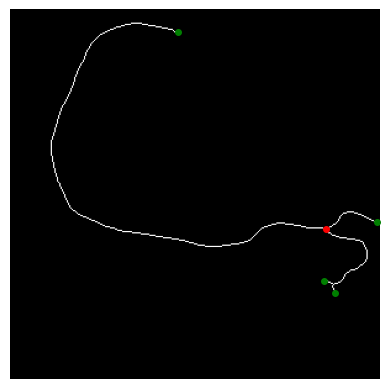

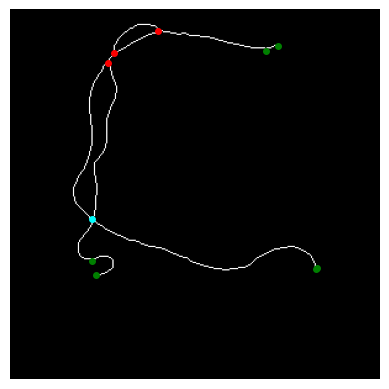

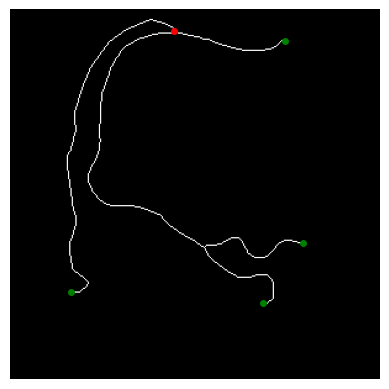

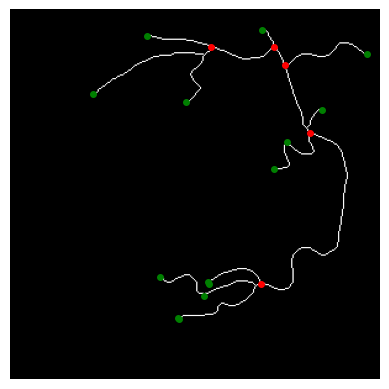

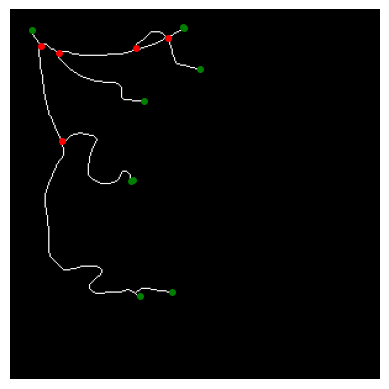

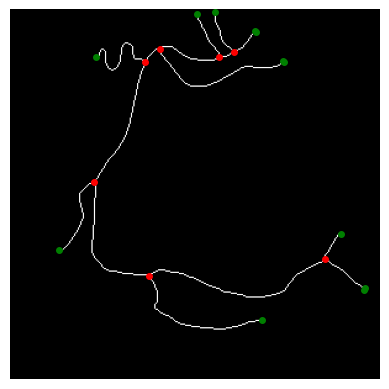

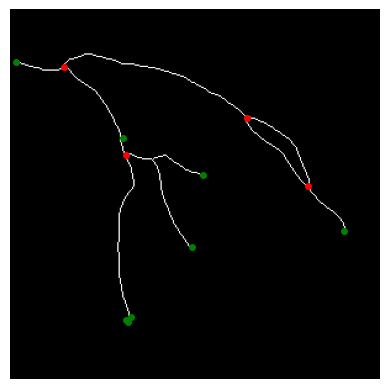

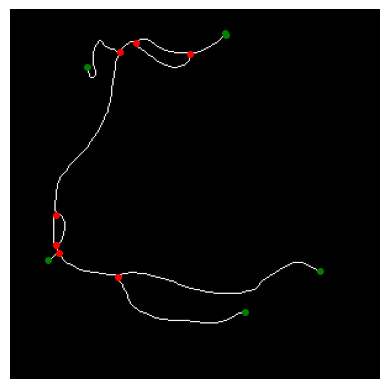

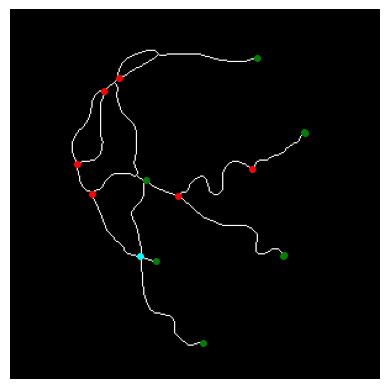

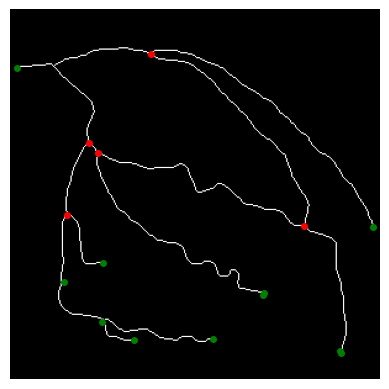

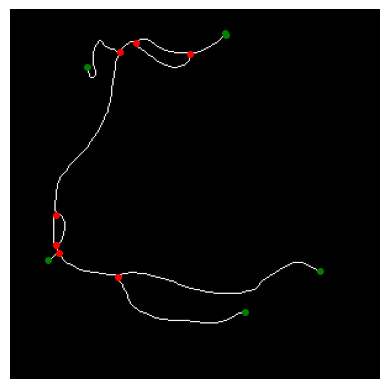

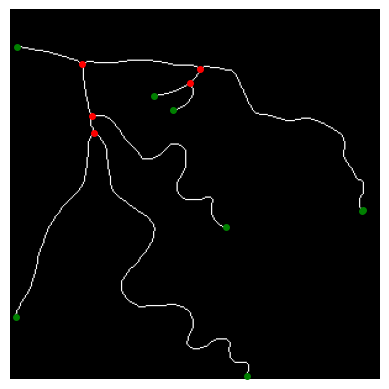

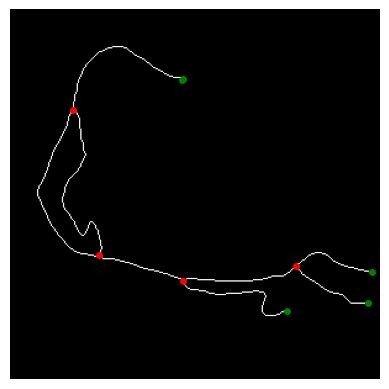

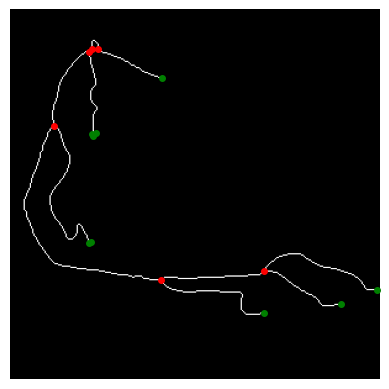

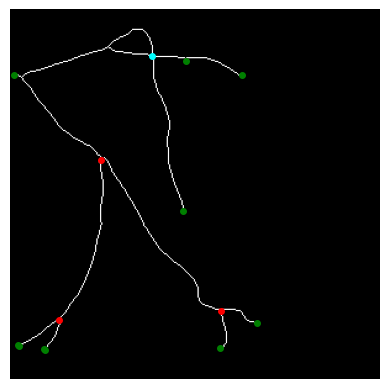

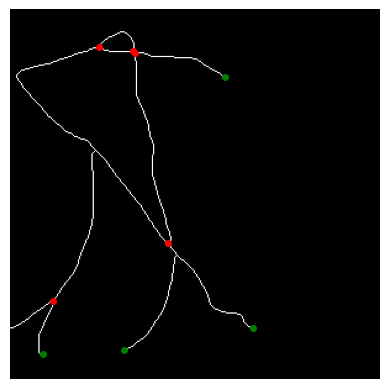

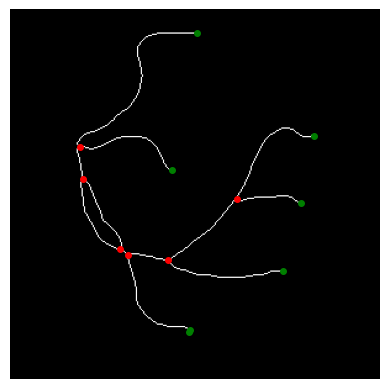

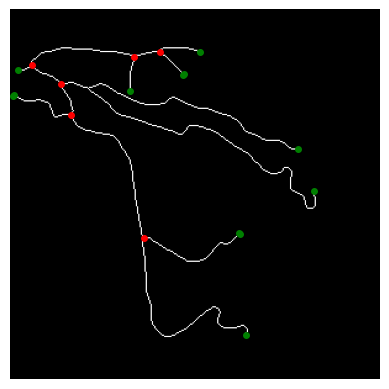

In [13]:
def complete_pipeline(path):
    img = read_img(path)
    skel = create_skeleton(img)
    borders, bif, tri = get_nodes(skel)

    draw_nodes(skel, [
        {'coords': borders, 'color': 'green'},
        {'coords': bif, 'color': 'red'},
        {'coords': tri, 'color': 'cyan'},
    ])

complete_pipeline('./database/1_gt.pgm')
complete_pipeline('./database/2_gt.pgm')
complete_pipeline('./database/3_gt.pgm')
complete_pipeline('./database/4_gt.pgm')
complete_pipeline('./database/5_gt.pgm')
complete_pipeline('./database/6_gt.pgm')
complete_pipeline('./database/7_gt.pgm')
complete_pipeline('./database/8_gt.pgm')
complete_pipeline('./database/9_gt.pgm')
complete_pipeline('./database/10_gt.pgm')
complete_pipeline('./database/13_gt.pgm')
complete_pipeline('./database/11_gt.pgm')
complete_pipeline('./database/12_gt.pgm')
complete_pipeline('./database/13_gt.pgm')
complete_pipeline('./database/14_gt.pgm')
complete_pipeline('./database/15_gt.pgm')
complete_pipeline('./database/16_gt.pgm')
complete_pipeline('./database/17_gt.pgm')
complete_pipeline('./database/18_gt.pgm')
complete_pipeline('./database/19_gt.pgm')
complete_pipeline('./database/20_gt.pgm')